In [1]:
from ipynb.fs.full.Utils import load_dataset, scale_data, split_data
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [2]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras import losses, optimizers
from keras.callbacks import EarlyStopping

/opt/anaconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
from sklearn import preprocessing
from sklearn import datasets
from sklearn import model_selection

In [4]:
df = load_dataset(split=False)

In [5]:
df.shape

(20653, 25)

In [6]:
metal = df[df.category == 'metal']
country = df[df.category == 'country']
rnb = df[df.category == 'rnb']
jazz = df[df.category == 'jazz']
indie_alt = df[df.category == 'indie_alt']
df = metal.append(country).append(rnb).append(jazz).append(indie_alt)

In [7]:
x = df.drop(['category'], axis=1)
y = pd.get_dummies(df['category'])

In [11]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, train_size=0.7, stratify=y, random_state=42)

/opt/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [12]:
number_of_classes = len(df['category'].unique())
print("classes: ", number_of_classes)

classes:  5


In [13]:
y_train.shape
y_test.shape

(1040, 5)

In [14]:
x_train.shape

(2425, 24)

In [15]:
number_of_features = x_train.shape[1]
output_size = number_of_classes

In [16]:
x_train, x_test = scale_data(x_train, x_test)

In [17]:
model = Sequential()

In [18]:
model.add(Dense(units = 60, input_dim = number_of_features, activation = 'relu'))

In [19]:
model.add(Dense(units=30, activation='relu'))

In [20]:
model.add(Dense(units = output_size, activation='softmax'))

In [21]:
model.compile(optimizer='adam', loss=losses.binary_crossentropy, metrics=['accuracy'])

In [22]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 60)                1500      
_________________________________________________________________
dense_2 (Dense)              (None, 30)                1830      
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 155       
Total params: 3,485
Trainable params: 3,485
Non-trainable params: 0
_________________________________________________________________


In [23]:
history = model.fit(x_train, y_train, epochs= 20, batch_size=32, verbose=0, validation_split=0.3, \
                    callbacks=[EarlyStopping(patience=3)])

In [24]:
epochs = history.epoch

In [25]:
loss = history.history['loss']
validation_loss = history.history['val_loss']

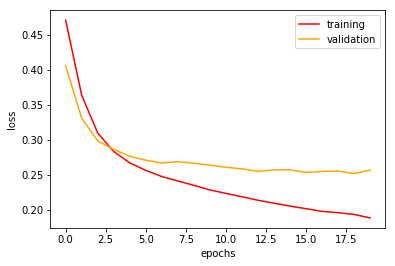

In [26]:
plt.xlabel('epochs')
plt.ylabel('loss')
plt.plot(epochs, loss, c='red', label='training')
plt.plot(epochs, validation_loss, c='orange', label='validation')
plt.legend(loc='best')

In [27]:
acc = history.history['acc']
validation_acc = history.history['val_acc']

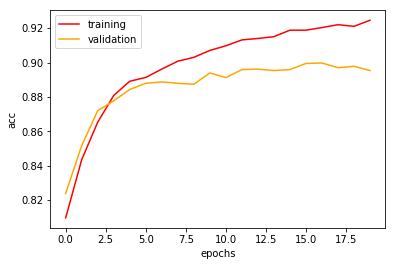

In [28]:
plt.xlabel('epochs')
plt.ylabel('acc')
plt.plot(epochs, acc, c='red', label='training')
plt.plot(epochs, validation_acc, c='orange', label='validation')
plt.legend(loc='best')

In [29]:
# evaluacija mreze
test_loss, test_acc = model.evaluate(x_test, y_test)
print ("Test loss: {}, test accuracy: {}".format(test_loss, test_acc))

1040/1040 [==============================] - 0s 150us/step
Test loss: 0.24591159224510192, test accuracy: 0.892115383881789


In [ ]:
#model.fit(x_train, y_train, epochs=7, batch_size=32)

In [30]:
print(x_test[1:2])
print(y_test[1:2]) # jazz

[[ 0.63313649 -0.25968638 -0.4093161   0.71543371 -0.28611733  1.49124943
  -0.46408757  2.16473424  1.04302847 -0.32430544 -1.3058912   0.22912818
  -0.32525552 -0.26755633 -0.28145467 -0.3435502  -0.31744555 -0.33447763
  -0.20846955 -0.28822352 -0.31507889 -0.27369937  2.63150843 -0.2567763 ]]
     country  indie_alt  jazz  metal  rnb
488        0          0     1      0    0


In [31]:
model.predict(x_test[1:2])

array([[4.6819974e-02, 2.7177659e-01, 6.6860753e-01, 2.9808102e-04,
        1.2497792e-02]], dtype=float32)

In [32]:
# model je ispravno pogodio!